In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('youtoxic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [4]:
# Очистка 
df2 = pd.read_csv('youtoxic.csv')
print(df['Text'])
df['Text'] = df2['Text']
print(df['Text'])


0      If only people would just take a step back and...
1      Law enforcement is not trained to shoot to app...
2      \nDont you reckon them 'black lives matter' ba...
3      There are a very large number of people who do...
4      The Arab dude is absolutely right, he should h...
                             ...                        
995    I remember that they sent in the national defe...
996    Stats don`t represent the problem. Race baitin...
997    The quote from the mother... Wow that hit hard...
998                              this video is so racist
999        God, the narrator has such an annoying lisp. 
Name: Text, Length: 1000, dtype: object
0      If only people would just take a step back and...
1      Law enforcement is not trained to shoot to app...
2      \nDont you reckon them 'black lives matter' ba...
3      There are a very large number of people who do...
4      The Arab dude is absolutely right, he should h...
                             ...                

In [5]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.describe().T

,count,unique,top,freq
CommentId,1000,1000,Ugg2KwwX0V8-aXgCoAEC,1
VideoId,1000,13,9pr1oE34bIM,274
Text,1000,997,run them over,3
IsToxic,1000,2,False,538
IsAbusive,1000,2,False,647
IsThreat,1000,2,False,979
IsProvocative,1000,2,False,839
IsObscene,1000,2,False,900
IsHatespeech,1000,2,False,862
IsRacist,1000,2,False,875


In [7]:
df.isna().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [8]:
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [9]:
def mis_val(data):
    mis_num = data.isnull().sum() 
    mis_num_percent = 100 * data.isnull().sum() /len(data)
    mis_val = pd.concat([mis_num, mis_num_percent], axis = 1)
    mis_val_ren_columns = mis_val.rename(
    columns = {0 : 'Missing values', 1 : '% of Total'})
    mis_val_ren_columns = mis_val_ren_columns[
        mis_val_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total', ascending = False).round(1)
    return mis_val_ren_columns


In [10]:
mis_val(df).sum()


Missing values    0.0
% of Total        0.0
dtype: float64

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [13]:
df.isna().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 43.0+ KB


In [18]:
int_types = ['uint8', 'int8', 'int16']
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [19]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 492.1 KB


In [20]:
for dtype in ['bool', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep = True).mean()
    mean_usage_mb = mean_usage_b / 1024
    print("Average memory usage for {} columns: {:03.3f} KB".format(dtype, mean_usage_mb))

Average memory usage for bool columns: 1.502 KB
Average memory usage for object columns: 120.089 KB


In [21]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep = True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep = True)
    usage_mb = usage_b / 1024
    return "{:03.3f} KB".format(usage_mb)

In [22]:
df_int = df.select_dtypes(include=['bool'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

19.531 KB
19.531 KB


,before,after
bool,12,12


In [23]:
optimized_df = df.copy()

optimized_df[converted_int.columns] = converted_int

print(mem_usage(df))
print(mem_usage(optimized_df))

492.073 KB
492.073 KB


In [24]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe().T

,count,unique,top,freq
CommentId,1000,1000,Ugg2KwwX0V8-aXgCoAEC,1
VideoId,1000,13,9pr1oE34bIM,274
Text,1000,997,run them over,3


In [25]:
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [26]:
print(mem_usage(df_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

480.354 KB
416.404 KB


,before,after
object,3.0,2
category,NaN,1


In [27]:
optimized_df[converted_obj.columns] = converted_obj
mem_usage(optimized_df)

'428.123 KB'

In [28]:
#df = optimized_df

In [29]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 492.1 KB


In [30]:
df.sample(10)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
976,UgjTW65H46WOzngCoAEC,TZxEyoplYbI,I dont understand why the black community wan...,True,True,False,False,False,True,True,False,False,False,False,False
459,Ugj2qHC0gktMKXgCoAEC,9pr1oE34bIM,"exactly right Stefan , crime and bad decisions...",True,True,False,True,False,False,False,False,False,False,False,False
49,UghlkAzZr3_fI3gCoAEC,04kJtp6pVXI,Can someone shoot this black idiot too? That w...,True,True,False,True,False,True,True,False,False,False,False,False
409,UgiFSYf7PhDUd3gCoAEC,9pr1oE34bIM,Good commentary. Perceptive and fair.,False,False,False,False,False,False,False,False,False,False,False,False
288,UggKO3TBRdgPF3gCoAEC,9pr1oE34bIM,it''s freaking 2014 and some people are still ...,True,True,False,False,False,False,False,False,False,False,False,False
672,UgyDPebKZNOABtNWGa54AaABAg,cT14IbTDW2c,If I ever get in a situation where I can run t...,True,True,True,True,False,False,False,False,False,False,False,False
479,UgjE9_GvZ2H4wngCoAEC,9pr1oE34bIM,This video is so biased and full of shit.,True,True,False,False,True,False,False,False,False,False,False,False
947,Ugim7HUsL6xP13gCoAEC,TZxEyoplYbI,"I see all these signs, ""black lives matter!"", ...",True,True,False,False,False,False,False,False,False,False,False,False
568,Ugg_LN-zUkz_PngCoAEC,cT14IbTDW2c,As if the traffic on the 5 isn't bad enough.,False,False,False,False,False,False,False,False,False,False,False,False
608,Ugw9izboxYcGQRhAvnJ4AaABAg,cT14IbTDW2c,Get a job!,True,True,False,True,False,False,False,False,False,False,False,False


In [31]:
#df['match_rating'] = df[['white_rating','black_rating']].mean(axis=1)

In [32]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
import re

# Оставим в тексте только кириллические символы
def clear_text(text: str) -> str:
  
  # Пишем регулярное выражение которое заменяет на ' '
  # все, что не входит в кириллический алфавит
  clear_text = re.sub(r'[^A-z]+', ' ', text).lower()
  return ' '.join(clear_text.split())
    
# напишем функцию удаляющую стоп-слова
def clean_stop_words(text : str,
                     stopwords : list):
  text = [word for word in text.split() if word not in stopwords]
  return " ".join(text)

stopwords = "the with"
df.head()
for x in range(3):

    text = df['Text'].values[8][:100]
    print(text)
    print('=======================================')
    print(clean_stop_words((clear_text(text)), stopwords))
    print()

I agree with the protestor.
agree protestor

I agree with the protestor.
agree protestor

I agree with the protestor.
agree protestor



In [34]:
import numpy as np
import pandas as pd
from pymystem3 import Mystem
from tqdm import tqdm 

#лематизация
def lemmatize(df : (pd.Series, pd.DataFrame),
              text_column : (None, str),
              n_samples : int,
              break_str = 'br',
             ) -> pd.Series:
    """
    Принимает:
    df -- таблицу или столбец pandas содержащий тексты,
    text_column -- название столбца указываем если передаем таблицу,
    n_samples -- количество текстов для объединения,
    break_str -- символ разделения, нужен для ускорения,
    количество текстов записанное в n_samples объединяется 
    в одит большой текст с предварительной вставкой символа 
    записанного в break_str между фрагментами
    затем большой текст лемматизируется, после чего разбивается на
    фрагменты по символу break_str
    
    
    Возвращает:
    Столбец pd.Series с лемматизированными текстами
    в которых все слова приведены к изначальной форме:
    * для существительных — именительный падеж, единственное число;
    * для прилагательных — именительный падеж, единственное число,
    мужской род;
    * для глаголов, причастий, деепричастий — глагол в инфинитиве 
    (неопределённой форме) несовершенного вида.
    
    """
    
    result =[]
    m = Mystem()
    
    if df.shape[0] % n_samples == 0 :
        
        n_iterations = df.shape[0] // n_samples
        
    else:
        
        n_iterations = (df.shape[0] // n_samples) + 1
    
    for i in tqdm(range(n_iterations)) :
        
        start = i * n_samples
        
        stop = start + n_samples
        
        sample = break_str.join(df[text_column][start : stop].values)
        
        lemmas = m.lemmatize(sample)
        
        lemm_sample = ''.join(lemmas).split(break_str)
        
        result += lemm_sample
        
    return pd.Series(result, index = df.index)
for _ in range(3):

    text = df.sample(n = 1)['Text'].values[0][:70]
    print(text)
    print('=======================================')
    #lemmatize(df, df['Text'].values[0][:70], df.shape[0])

This made me mad why didn’t you just point guns at them
Wait, so who was rioting again? The people standing boredly on the sid
Fuck mo and kansas city


In [35]:
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

stopwords = "the to and is of that he to in this it are they was he not for have on be if with but just do you all like"
counter = CountVectorizer(ngram_range=(1, 1))
df_cleared = df
df_cleared['Text'] = df['Text'].apply(lambda x: clean_stop_words(x, stopwords))
count = counter.fit_transform(df_cleared['Text'])

frequence = pd.DataFrame(
  # получаем словарь из CountVectorizer 
	# c помощью .get_feature_names_out()
  {'word' : counter.get_feature_names_out(),
  # получаем частотность слов 
	# находя сумму компонент векторов
  'frequency' : np.array(count.sum(axis = 0))[0]
    }).sort_values(by = 'frequency', ascending = False)
print(df_cleared)
frequence_filtered = frequence[0:200]
#print(dict(frequence_filtered.values))


                CommentId      VideoId  \
0    Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1    Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2    Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3    Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4    Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   
..                    ...          ...   
995  Ugi5ADt10EdDz3gCoAEC  XRuCW80L9mA   
996  Ugifh2DMhBbDkHgCoAEC  XRuCW80L9mA   
997  Ugj_plbGBjjzYXgCoAEC  XRuCW80L9mA   
998  Ugj0bah1De8xy3gCoAEC  XRuCW80L9mA   
999  UgjBJKQSoQMQ6ngCoAEC  XRuCW80L9mA   

                                                  Text  IsToxic  IsAbusive  \
0    If only people would take step back make case ...    False      False   
1    Law enforcement trained shoot apprehend. They ...     True       True   
2    Dont reckon them 'black lives matter' banners ...     True       True   
3    There very large number people who police offi...    False      False   
4    The Arab dude absolutely right, should been sh...    False      False   
..                         

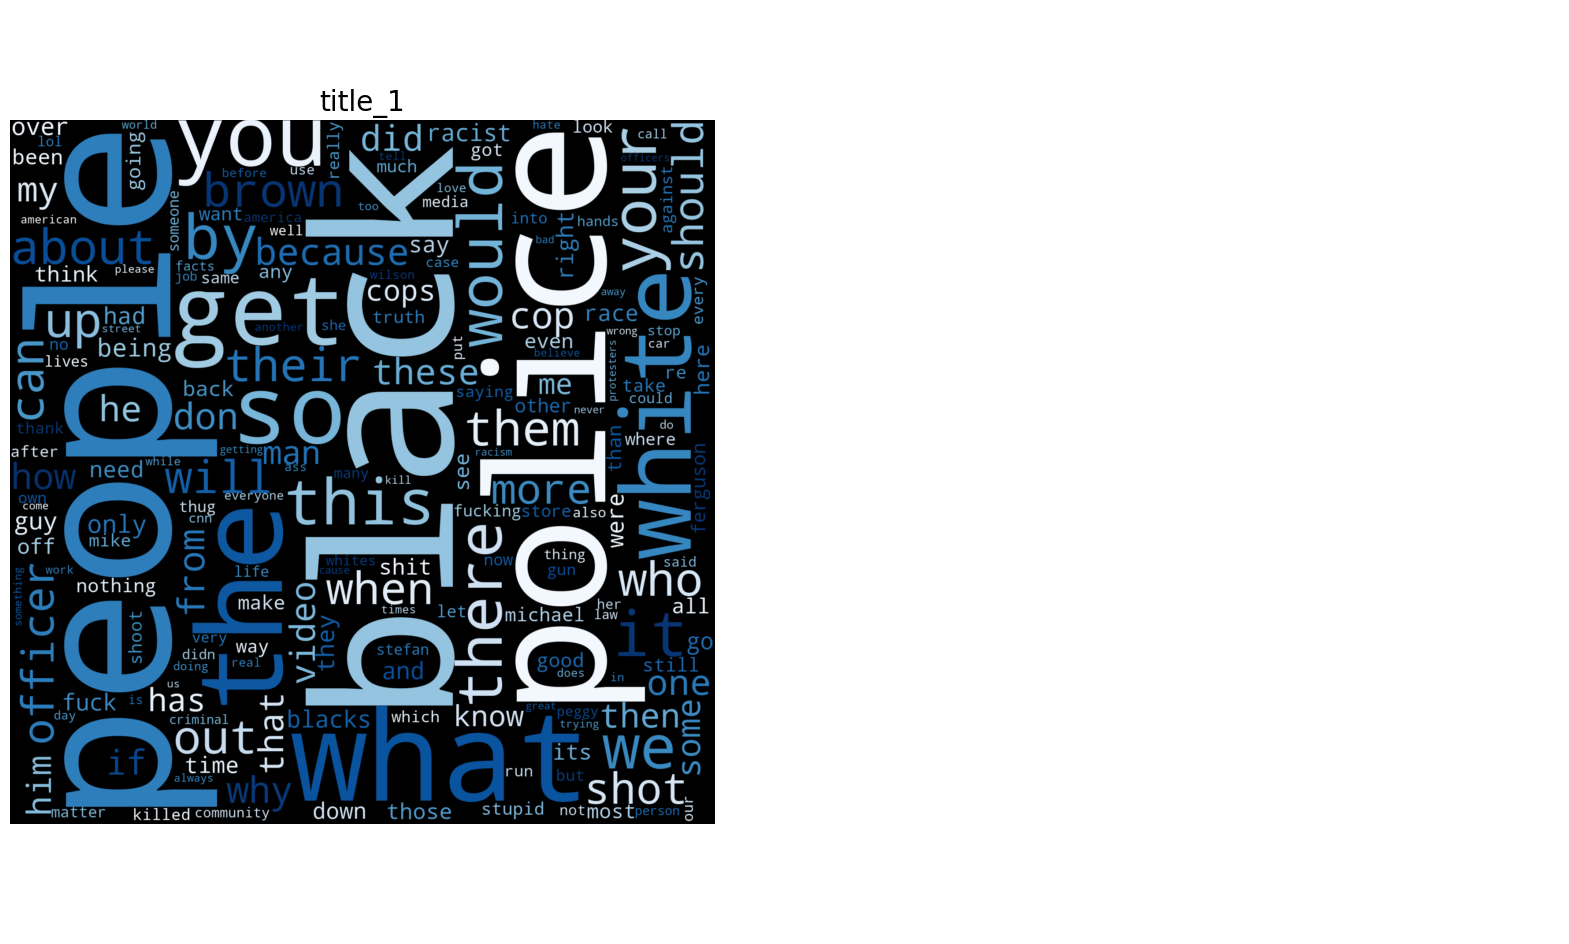

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Генерируем красивые картинки со словами
# на которых размер шрифта соответствует частотности
wordcloud = WordCloud(background_color="black",
                               colormap = 'Blues',
                               max_words=200,
                               mask=None, 
                               width=1600,
                               height=1600)\
                        .generate_from_frequencies(
                            dict(frequence_filtered.values))


# Выводим картинки сгенерированные вордклаудом
# С помощью matplotlib.pyplot
fig, ax = plt.subplots(1, 2, figsize = (20, 12))


ax[0].imshow(wordcloud, interpolation='bilinear')

ax[0].set_title('title_1',
               fontsize = 20
               )


ax[0].axis("off")
ax[1].axis("off")

plt.show()

(-1.0999995103764544,
 1.0999999766845932,
 -1.0999999939582368,
 1.0999999995025025)

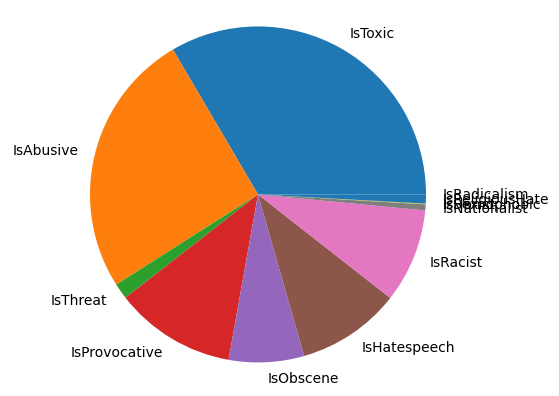

In [37]:
vals = [df['IsToxic'].value_counts()[True], df['IsAbusive'].value_counts()[True], df['IsThreat'].value_counts()[True], 
        df['IsProvocative'].value_counts()[True], df['IsObscene'].value_counts()[True], df['IsHatespeech'].value_counts()[True],
        df['IsRacist'].value_counts()[True], df['IsNationalist'].value_counts()[True], df['IsSexist'].value_counts()[True],
        0, df['IsReligiousHate'].value_counts()[True], 0]
labels = df.columns.values.tolist()[3:]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

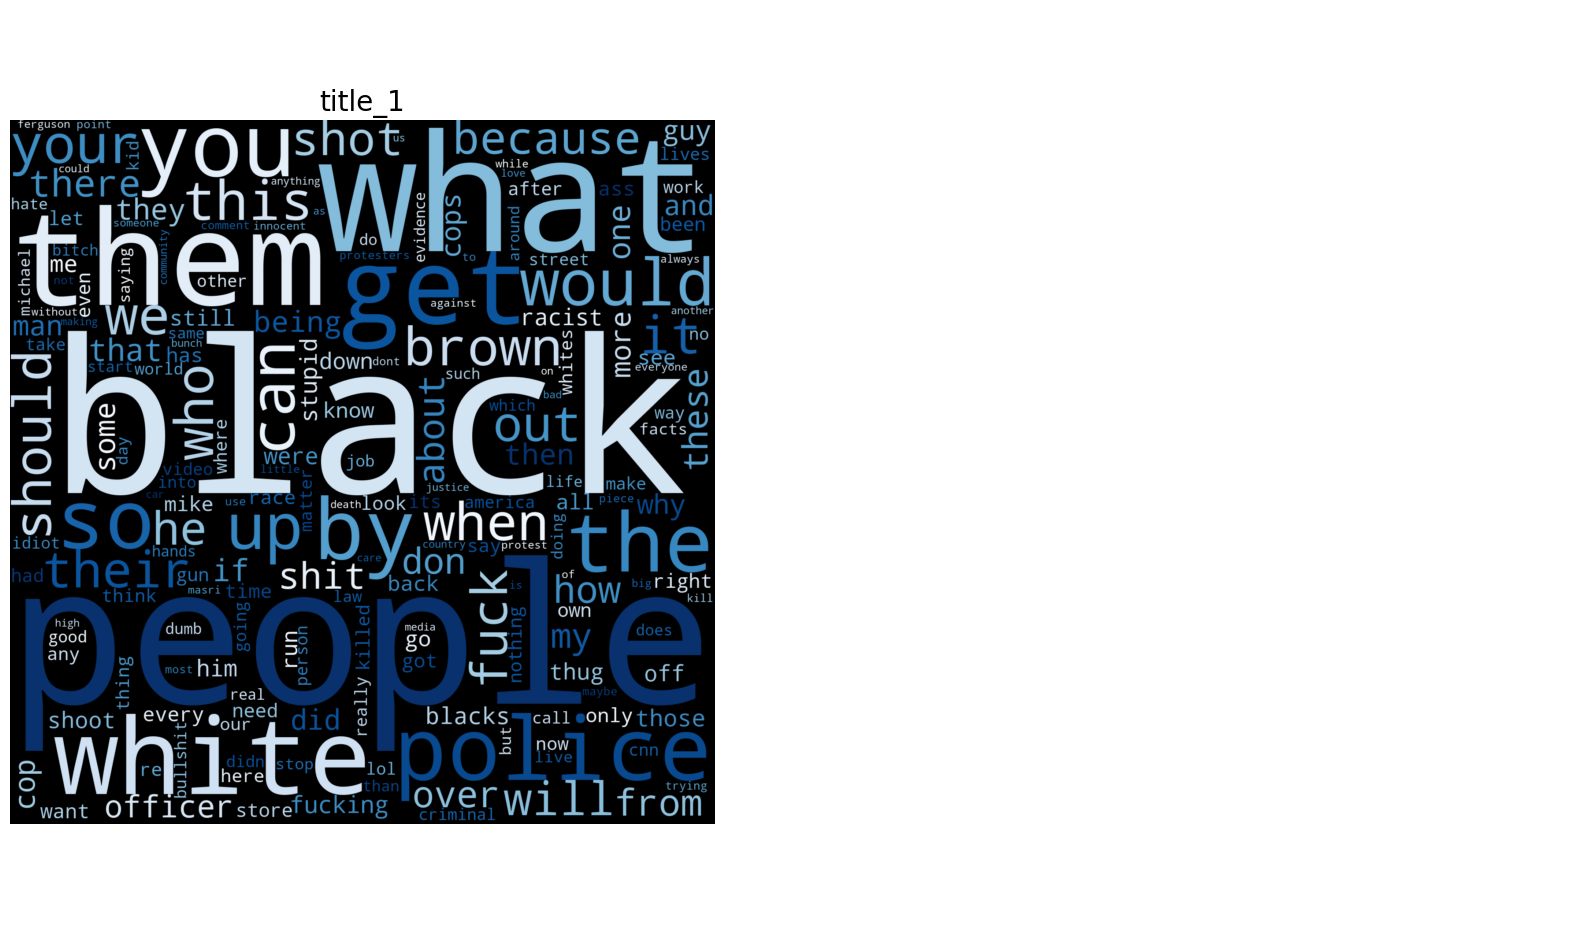

In [38]:
df_toxic = df[df_cleared["IsToxic"] == True]
count = counter.fit_transform(df_toxic['Text'])

frequence = pd.DataFrame(
  # получаем словарь из CountVectorizer 
	# c помощью .get_feature_names_out()
  {'word' : counter.get_feature_names_out(),
  # получаем частотность слов 
	# находя сумму компонент векторов
  'frequency' : np.array(count.sum(axis = 0))[0]
    }).sort_values(by = 'frequency', ascending = False)
frequence_filtered = frequence[0:200]


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Генерируем красивые картинки со словами
# на которых размер шрифта соответствует частотности
wordcloud = WordCloud(background_color="black",
                               colormap = 'Blues',
                               max_words=200,
                               mask=None, 
                               width=1600,
                               height=1600)\
                        .generate_from_frequencies(
                            dict(frequence_filtered.values))


# Выводим картинки сгенерированные вордклаудом
# С помощью matplotlib.pyplot
fig, ax = plt.subplots(1, 2, figsize = (20, 12))


ax[0].imshow(wordcloud, interpolation='bilinear')

ax[0].set_title('title_1',
               fontsize = 20
               )


ax[0].axis("off")
ax[1].axis("off")

plt.show()

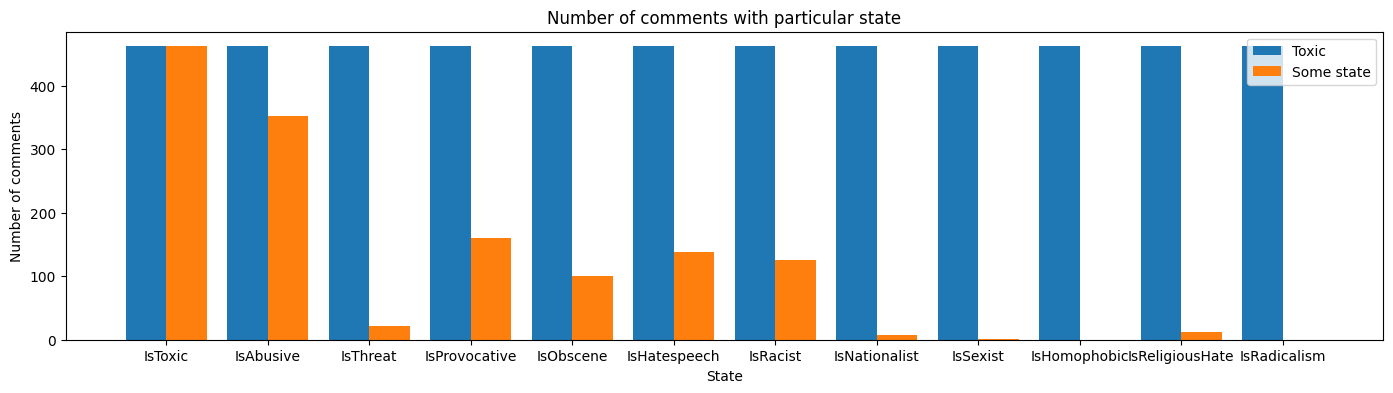

In [39]:
X_axis = np.arange(len(labels))
vals = [df['IsToxic'].value_counts()[True], df['IsAbusive'].value_counts()[True], df['IsThreat'].value_counts()[True], 
        df['IsProvocative'].value_counts()[True], df['IsObscene'].value_counts()[True], df['IsHatespeech'].value_counts()[True],
        df['IsRacist'].value_counts()[True], df['IsNationalist'].value_counts()[True], df['IsSexist'].value_counts()[True],
        0, df['IsReligiousHate'].value_counts()[True], 0]
plt.figure(figsize=(17, 4))
plt.bar(X_axis - 0.2, vals[0], 0.4, label = 'Toxic')
plt.bar(X_axis + 0.2, vals, 0.4, label = 'Some state')
plt.xlabel("State")
plt.ylabel("Number of comments")
plt.title("Number of comments with particular state")
plt.xticks(X_axis, labels)
plt.legend()

plt.show()

C:\Users\kozlo\AppData\Local\Temp\ipykernel_15364\4039497524.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

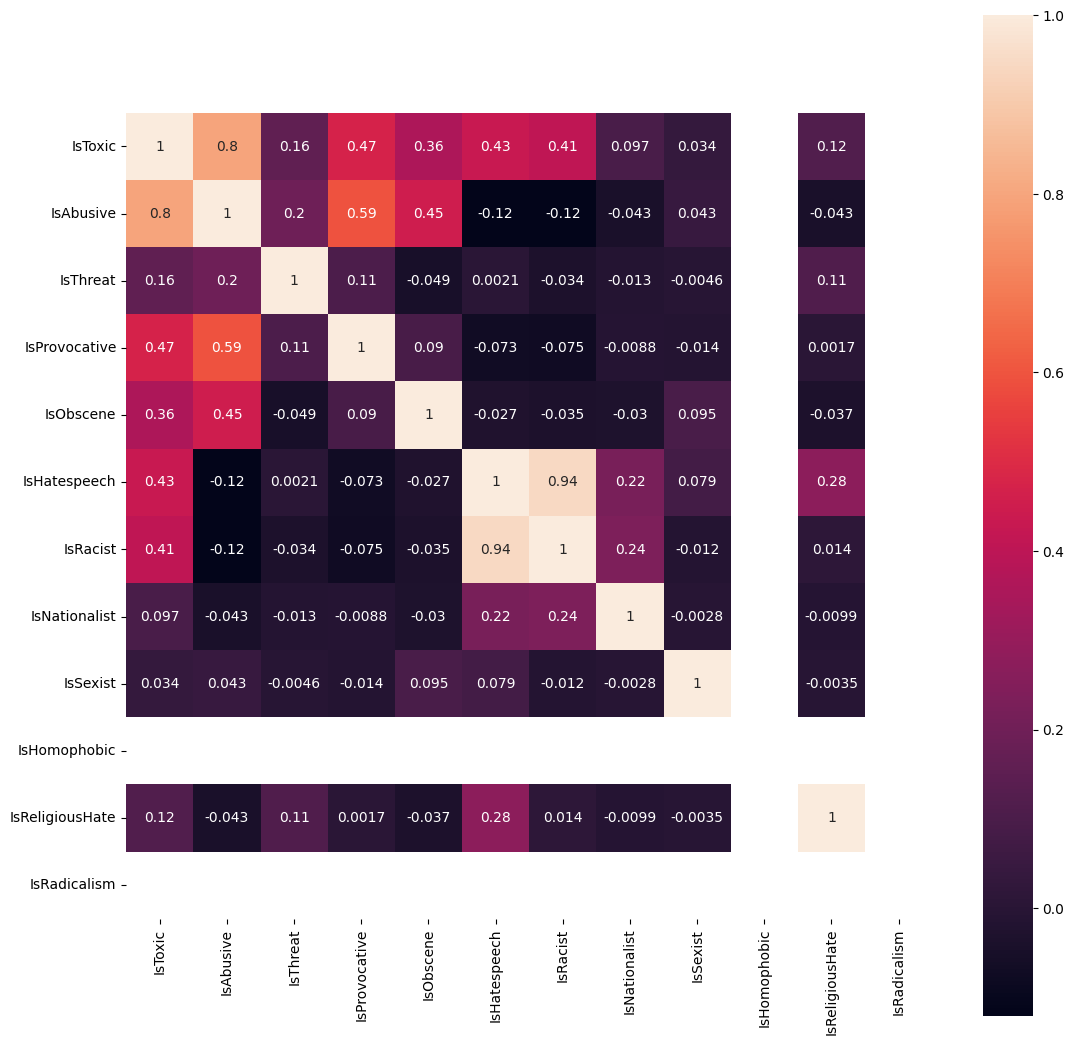

In [40]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(), annot=True, fmt='.2g', square = True, ax=ax)